In [26]:
#import libraries 
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Descriptors

In [3]:
#read data csv
df = pd.read_csv('~/Documents/glp_full.csv')

In [5]:
#examine dataframe
df.describe()

,pChEMBL Value
count,1331.000000
mean,8.069617
std,1.648994
min,4.000000
25%,6.750000
50%,7.930000
75%,9.640000
max,11.000000


In [6]:
#observe df structure
df.head()

,Smiles,pChEMBL Value
0,CCc1cc(OC)ccc1-c1ccc(C[C@H](NC(=O)[C@H](CC(=O)...,6.01
1,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,7.82
2,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,7.77
3,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,10.26
4,CC[C@H](C)[C@@H]1NC(=O)[C@H](CCC(=O)O)NC(=O)[C...,9.85


In [8]:
#check for missing values 
df.isnull().sum()

Smiles           0
pChEMBL Value    0
dtype: int64

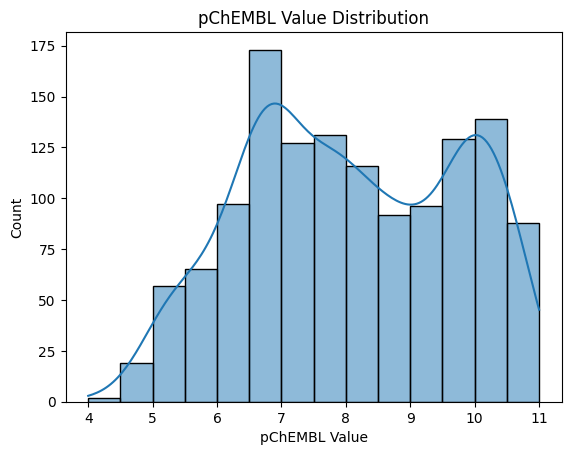

In [24]:
#visualisation of pChEMBL Values
sns.histplot(df['pChEMBL Value'], kde=True)
plt.title('pChEMBL Value Distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

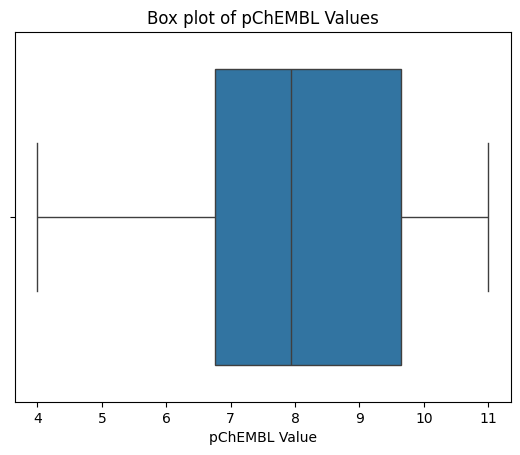

In [25]:
#pChEMBL outliers plot
sns.boxplot(x=df['pChEMBL Value'])
plt.title('Box plot of pChEMBL Values')
plt.show

In [41]:
#convert smiles to molecular descriptors and drop smiles column
df['mol'] = df['Smiles'].apply(Chem.MolFromSmiles)
df['mol_weight'] = df['mol'].apply(Descriptors.MolWt)
df_molsmiles = df.drop('mol', axis=1)
df_molsmiles.head()

,Smiles,pChEMBL Value,mol_weight
0,CCc1cc(OC)ccc1-c1ccc(C[C@H](NC(=O)[C@H](CC(=O)...,6.01,1497.694
1,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,7.82,3722.136
2,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@...,7.77,3451.895
3,CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...,10.26,3355.718
4,CC[C@H](C)[C@@H]1NC(=O)[C@H](CCC(=O)O)NC(=O)[C...,9.85,2160.344


In [42]:
#drop mol column to make dataframe numerical
df_molwt = df_molsmiles.drop('Smiles', axis=1)
df_molwt.head()

,pChEMBL Value,mol_weight
0,6.01,1497.694
1,7.82,3722.136
2,7.77,3451.895
3,10.26,3355.718
4,9.85,2160.344


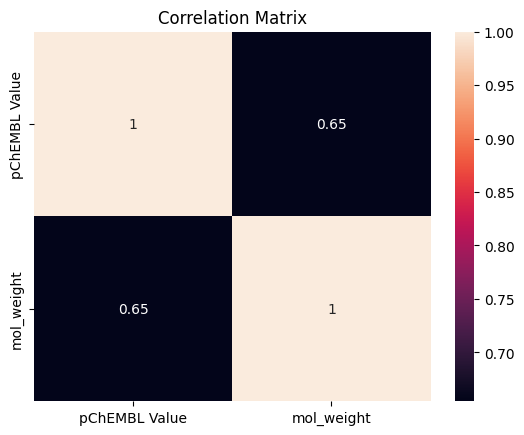

In [43]:
#correlation matrix of molecular weight and pchembl value
matrix = df_molwt.corr()
sns.heatmap(matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

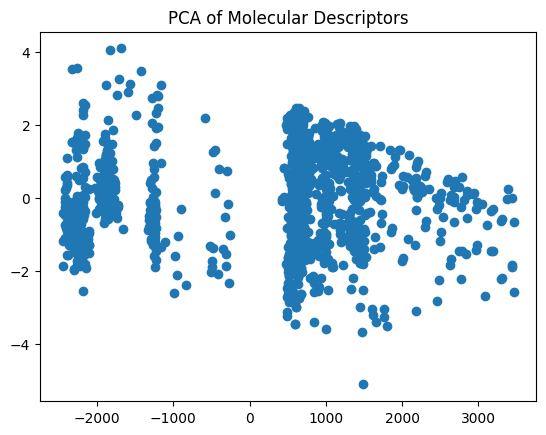

In [47]:
#PCA analysis of molecular descriptors
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_molwt)

plt.scatter(pca_results[:, 0], pca_result[:, 1])
plt.title('PCA of Molecular Descriptors')
plt.show()


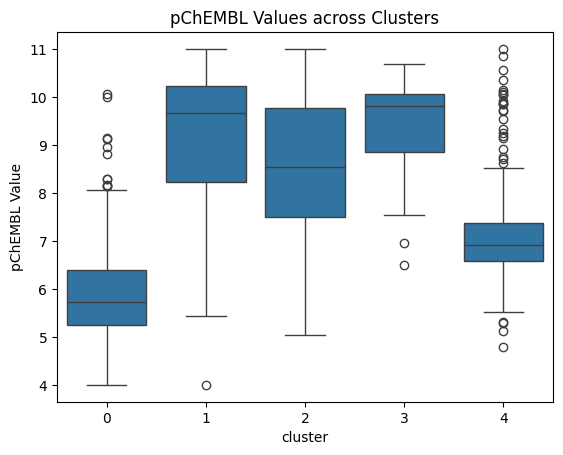

In [50]:
#cluster analysis of pchembl values 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df_molwt)

sns.boxplot(x='cluster', y='pChEMBL Value', data=df)
plt.title('pChEMBL Values across Clusters')
plt.show()
